<a href="https://colab.research.google.com/github/princeprajapati16/Heart-Diseases-Prediction/blob/main/Heart_Diseases_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Heart Diseases Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/Heart Diseases Dataset.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


###  Checking for missing values

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


<Axes: >

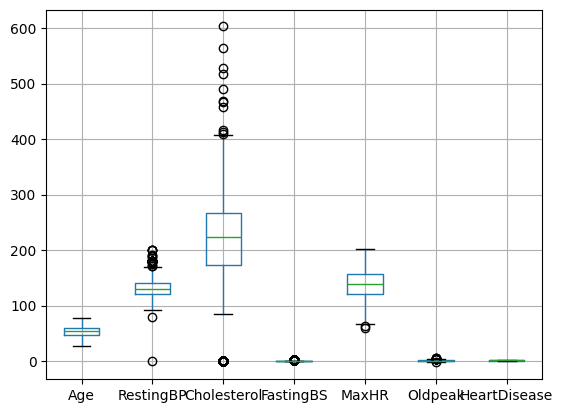

In [ ]:
df.boxplot()

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.drop(columns=['RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'], axis=1, inplace=True)

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,HeartDisease
0,40,M,ATA,140,289,0,0
1,49,F,NAP,160,180,0,1
2,37,M,ATA,130,283,0,0
3,48,F,ASY,138,214,0,1
4,54,M,NAP,150,195,0,0
...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,1
914,68,M,ASY,144,193,1,1
915,57,M,ASY,130,131,0,1
916,57,F,ATA,130,236,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            918 non-null    int64 
 1   Sex            918 non-null    object
 2   ChestPainType  918 non-null    object
 3   RestingBP      918 non-null    int64 
 4   Cholesterol    918 non-null    int64 
 5   FastingBS      918 non-null    int64 
 6   HeartDisease   918 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 50.3+ KB


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'HeartDisease'],
      dtype='object')

### Univariate Analysis

In [ ]:
df['HeartDisease'].value_counts(normalize =True)*100

,proportion
HeartDisease,
1,55.337691
0,44.662309


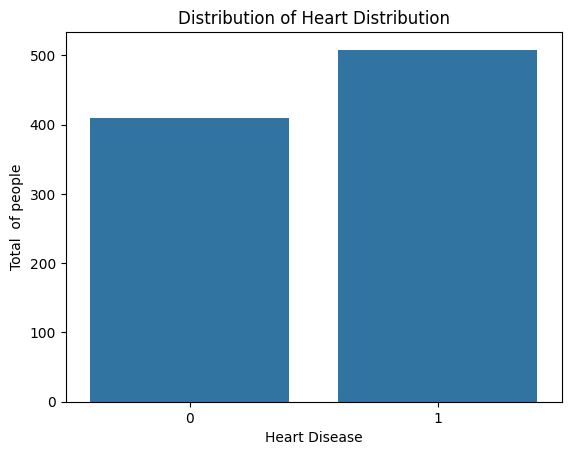

In [ ]:
sns.countplot(x='HeartDisease' ,data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Total  of people')
plt.title('Distribution of Heart Distribution')
plt.show()

In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,725
F,193


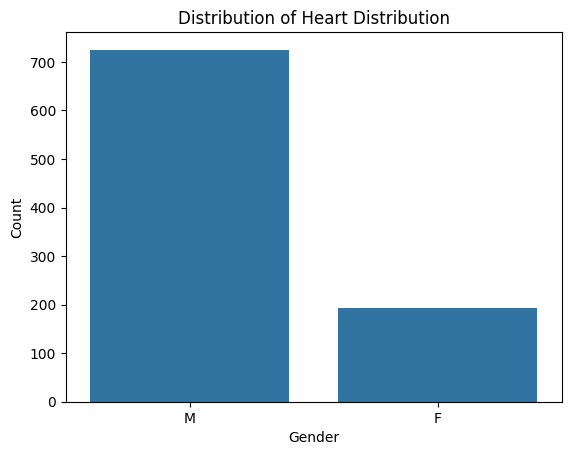

In [ ]:
sns.countplot(x='Sex',data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Heart Distribution')
plt.show()

### Bivariate Analysis

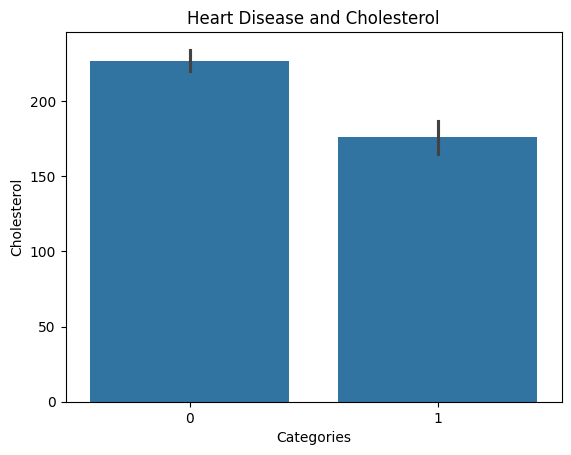

In [ ]:
sns.barplot(x='HeartDisease', y='Cholesterol', data=df)
plt.xlabel('Categories')
plt.ylabel('Cholesterol')
plt.title('Heart Disease and Cholesterol')
plt.show()

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'HeartDisease'],
      dtype='object')


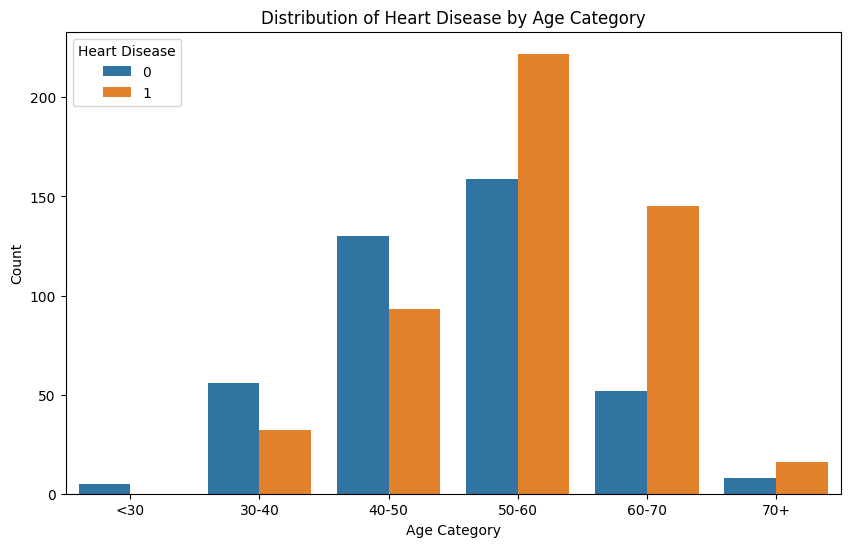

In [ ]:
print(df.columns)
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, np.inf],
                           labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=df)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Age Category')
plt.legend(title='Heart Disease', loc='upper left')
plt.show()

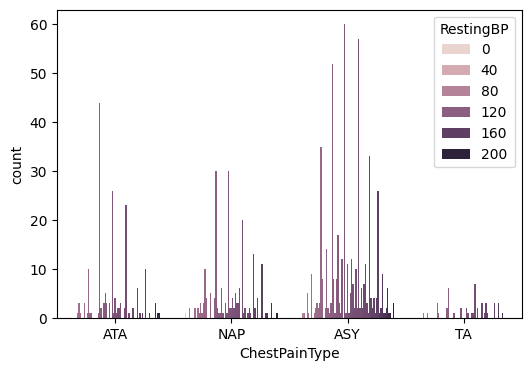

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='ChestPainType', hue='RestingBP')
plt.show()

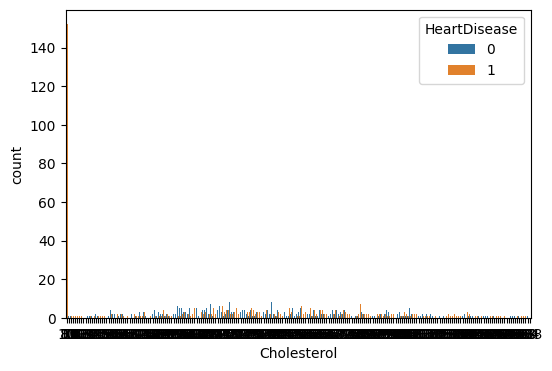

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x='Cholesterol',hue='HeartDisease')
plt.show()

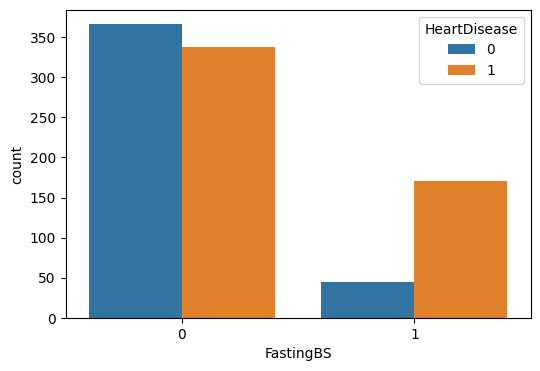

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x='FastingBS',hue='HeartDisease')
plt.show()

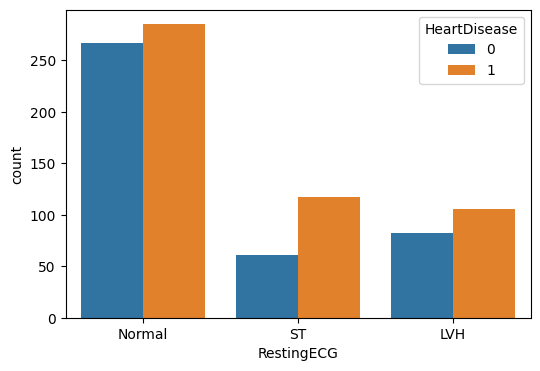

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x='RestingECG',hue='HeartDisease')
plt.show()

###  Pairplot

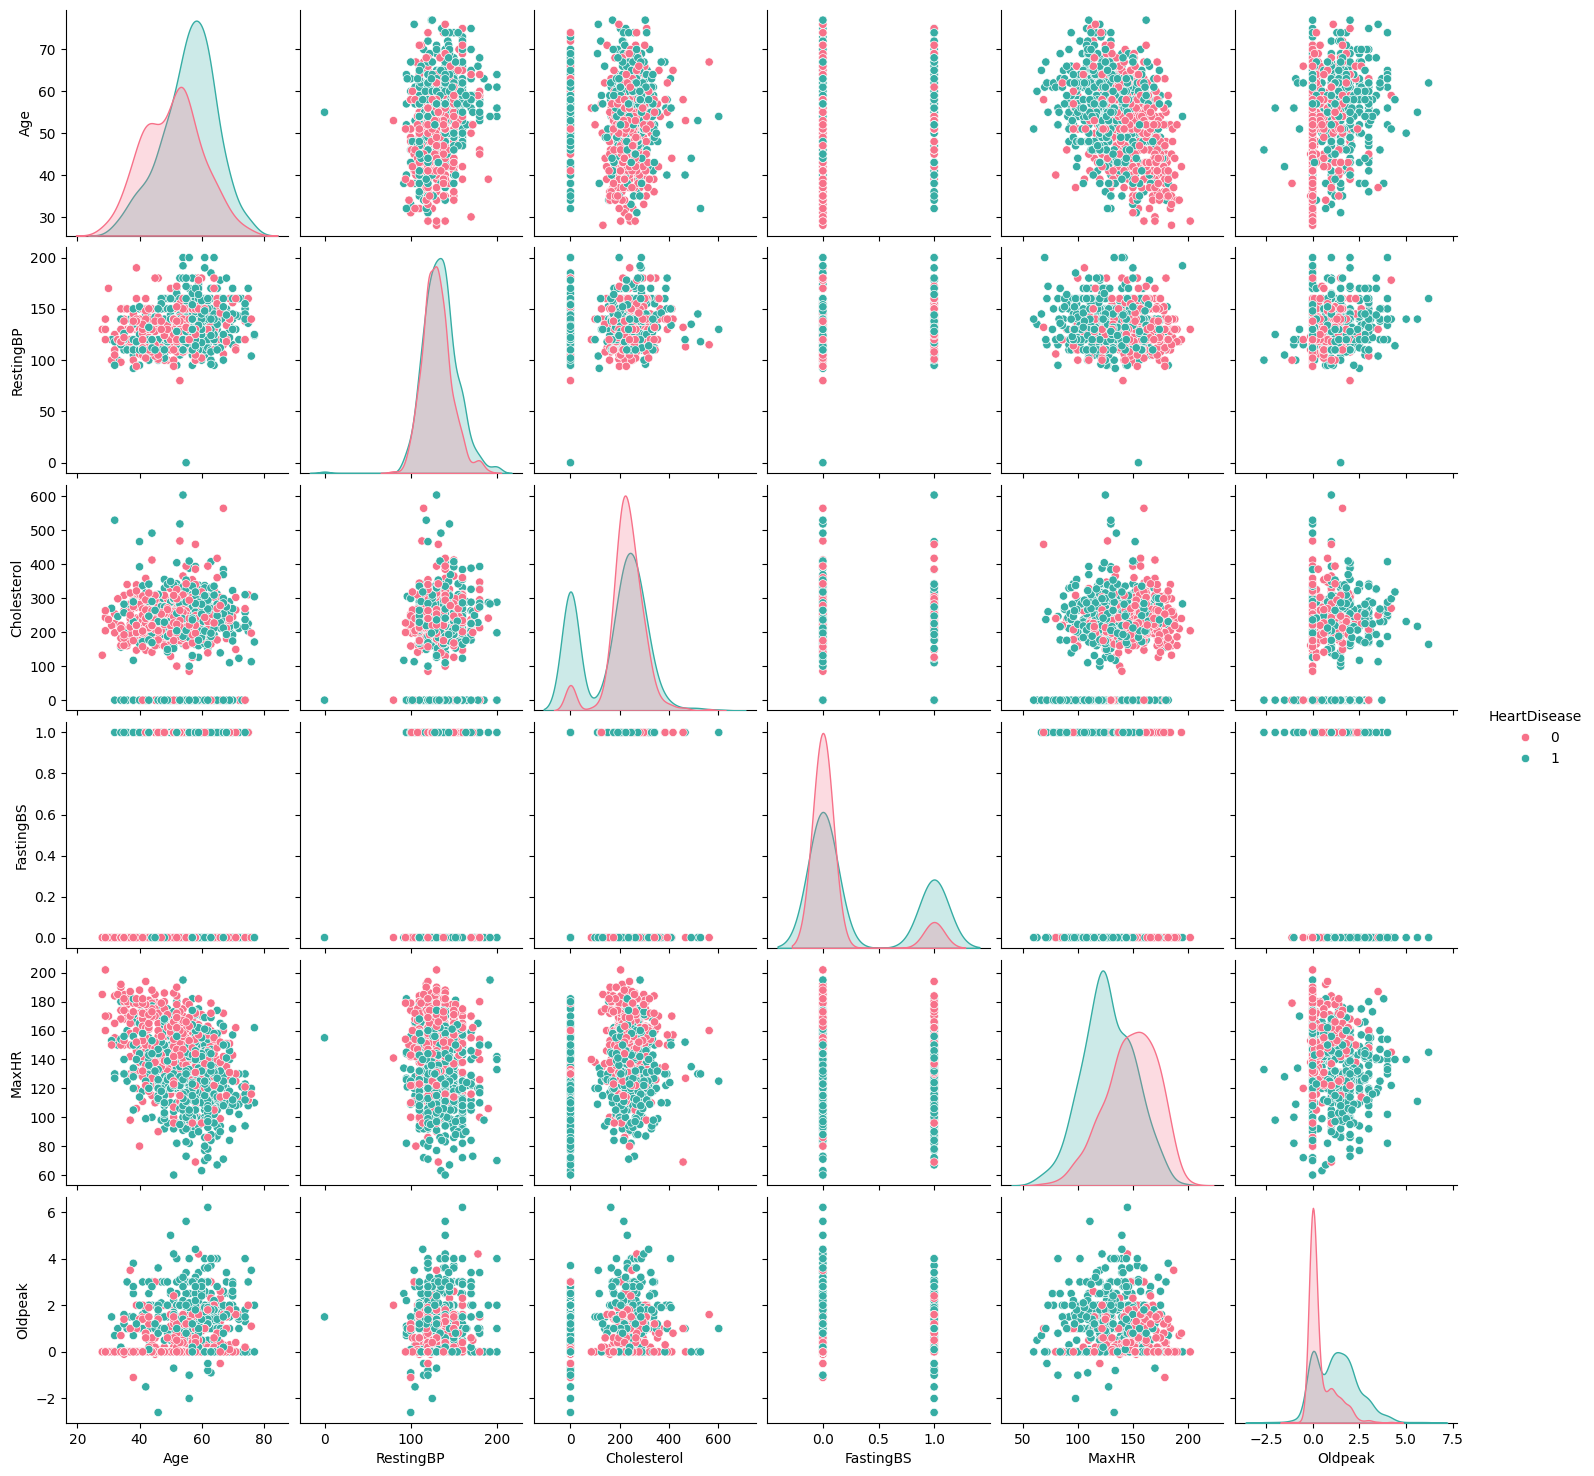

In [ ]:
sns.pairplot(df, hue = 'HeartDisease', kind = "scatter", palette = "husl")
plt.show()

### Converting AgeCategory to Mid value

In [ ]:
df['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

In [ ]:
df['Age'] = df['Age'].astype(str).str.replace('18-24','21').str.replace('25-29','27').astype(int)

In [ ]:
df['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

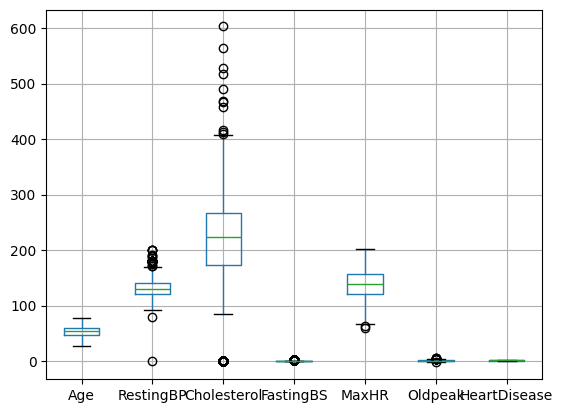

In [ ]:
df.boxplot()
plt.show()

### IQR Score

In [ ]:
columns_to_treat = ['Cholesterol'] # Removed 'SleepTime'
for col in columns_to_treat:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    median_value = df[col].median()
    df.loc[outliers, col] = median_value

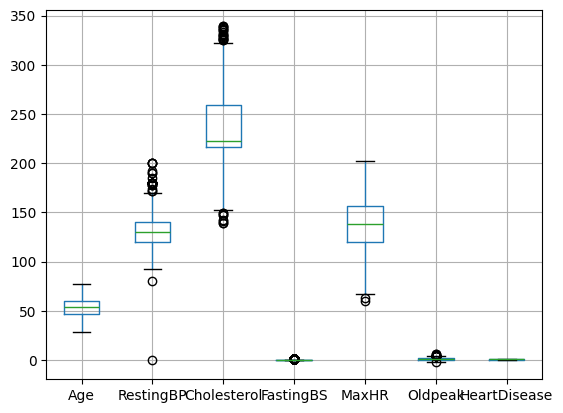

In [ ]:
df.boxplot()
plt.show()

### Label Encoding

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'AgeCategory'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG']
le = LabelEncoder()
df
for col in columns_to_encode:
 df[col] = le.fit_transform(df[col])


In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
0,12,1,1,41,136,0,1,172,N,0.0,Up,0,30-40
1,21,0,2,55,29,0,1,156,N,1.0,Flat,1,40-50
2,9,1,1,31,130,0,2,98,N,0.0,Up,0,30-40
3,20,0,0,39,61,0,1,108,Y,1.5,Flat,1,40-50
4,26,1,2,49,42,0,1,122,N,0.0,Up,0,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,111,0,1,132,N,1.2,Flat,1,40-50
914,40,1,0,45,40,1,1,141,N,3.4,Flat,1,60-70
915,29,1,0,31,70,0,1,115,Y,1.2,Flat,1,50-60
916,29,0,1,31,83,0,0,174,N,0.0,Flat,1,50-60


###  Split Test and Train

In [ ]:
X = df.drop('HeartDisease',axis=1)
y = df[['HeartDisease']]
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

###  Scaling the data

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()
df
for col in columns_to_encode:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [ ]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,AgeCategory
528,21,1,2,32,2,0,1,127,Y,1.5,Flat,40-50
704,22,1,0,49,90,0,0,128,N,2.6,Flat,40-50
675,29,1,2,49,70,1,1,173,N,0.2,Up,50-60
245,26,1,3,22,20,0,1,137,N,2.0,Up,50-60
257,8,1,2,49,10,0,1,172,N,0.0,Up,30-40


In [ ]:
y_train.head()

,HeartDisease
528,1
704,1
675,0
245,0
257,0


###  LOGISTIC REGRESSION

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Heart Diseases Dataset.csv")
print(df.dtypes)  # Check data types
print(df.head())  # Preview data


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply to all object (string) columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df = pd.get_dummies(df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Replace 'HeartDisease' with the actual name of your target column
target_column = 'HeartDisease'

X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

###  Test

In [ ]:
y_proba_test = model.predict_proba(X_test)
y_proba_test

array([[0.93487801, 0.06512199],
       [0.88179073, 0.11820927],
       [0.0388843 , 0.9611157 ],
       [0.03183778, 0.96816222],
       [0.91584278, 0.08415722],
       [0.18448938, 0.81551062],
       [0.23132262, 0.76867738],
       [0.85202202, 0.14797798],
       [0.54265677, 0.45734323],
       [0.00500064, 0.99499936],
       [0.58485997, 0.41514003],
       [0.86444534, 0.13555466],
       [0.46950165, 0.53049835],
       [0.83910013, 0.16089987],
       [0.11976266, 0.88023734],
       [0.29958125, 0.70041875],
       [0.97125403, 0.02874597],
       [0.019778  , 0.980222  ],
       [0.38501036, 0.61498964],
       [0.91799117, 0.08200883],
       [0.42564883, 0.57435117],
       [0.28514094, 0.71485906],
       [0.95929866, 0.04070134],
       [0.32892665, 0.67107335],
       [0.01234249, 0.98765751],
       [0.16409465, 0.83590535],
       [0.89440211, 0.10559789],
       [0.01534679, 0.98465321],
       [0.88593793, 0.11406207],
       [0.93817273, 0.06182727],
       [0.

In [ ]:
y_pred_test= model.predict(X_test)
y_pred_test

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
metrics.accuracy_score(y_test,y_pred_test)

0.842391304347826

In [ ]:
model.coef_

array([[ 0.02819216,  1.17236925, -0.6109584 ,  0.00670384, -0.00448291,
         0.86217265, -0.18500188, -0.00364914,  1.24220767,  0.43976084,
        -1.61081813]])

In [ ]:
model.intercept_

array([0.166161])

In [ ]:
print('Intercept of the logistic model fitted is: ',model.intercept_)
print('Coefficients of the features are: ',model.coef_)

Intercept of the logistic model fitted is:  [0.166161]
Coefficients of the features are:  [[ 0.02819216  1.17236925 -0.6109584   0.00670384 -0.00448291  0.86217265
  -0.18500188 -0.00364914  1.24220767  0.43976084 -1.61081813]]


In [ ]:
columns_list = df.columns.tolist()
columns_list

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [ ]:
coef = model.coef_.squeeze().tolist()
coef

[0.028192160823620152,
 1.1723692470751665,
 -0.6109584032489591,
 0.006703838291759664,
 -0.004482905717307891,
 0.8621726460214421,
 -0.18500187665220455,
 -0.003649135038157759,
 1.2422076719473825,
 0.4397608432745762,
 -1.6108181323861328]

In [ ]:
model_coef = list(zip(columns_list, coef))
model_coef

[('Age', 0.028192160823620152),
 ('Sex', 1.1723692470751665),
 ('ChestPainType', -0.6109584032489591),
 ('RestingBP', 0.006703838291759664),
 ('Cholesterol', -0.004482905717307891),
 ('FastingBS', 0.8621726460214421),
 ('RestingECG', -0.18500187665220455),
 ('MaxHR', -0.003649135038157759),
 ('ExerciseAngina', 1.2422076719473825),
 ('Oldpeak', 0.4397608432745762),
 ('ST_Slope', -1.6108181323861328)]

In [ ]:
model_score = model.score(X_test,y_test)
model_score

0.842391304347826

In [ ]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        77
           1       0.90      0.82      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_test))

[[67 10]
 [19 88]]


In [ ]:
conf_matrix = np.array([[81755,614],
                        [7563,584]])
TN=conf_matrix[0,0]
FP=conf_matrix[0,1]
FN=conf_matrix[1,0]
TP=conf_matrix[1,1]

In [ ]:
print("True Positive :", TP)
print("True Negative :", TN)
print("False Positive :",FP)
print("False Negative :",FN)

True Positive : 584
True Negative : 81755
False Positive : 614
False Negative : 7563


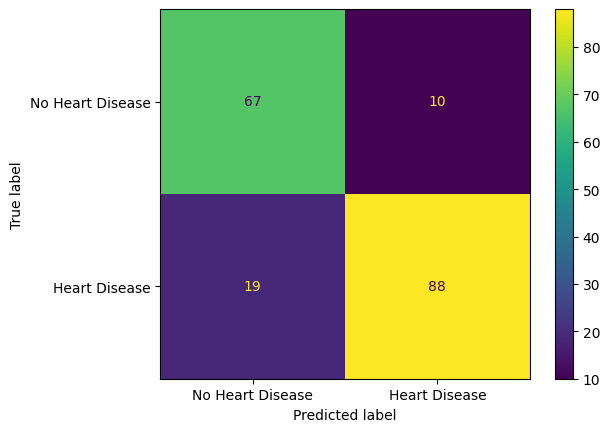

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)  # Calculate confusion matrix
class_labels = ["No Heart Disease", "Heart Disease"]
disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)
disp.plot()
plt.show()

### AUC and RUC Curve

In [ ]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
auc_roc = roc_auc_score(y_test,y_pred_test)
print(f"AUC-ROC Score: {auc_roc}")

AUC-ROC Score: 0.8462798883359631


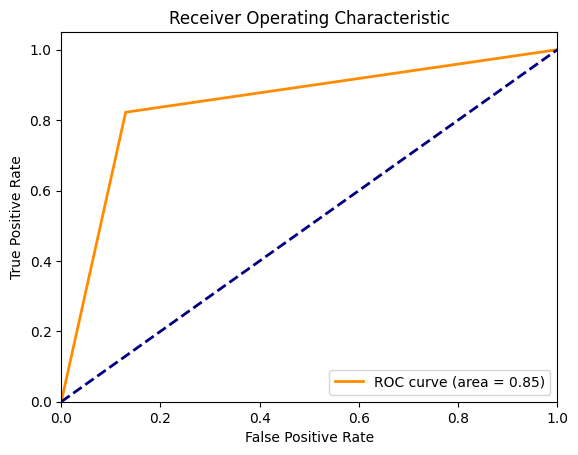

In [ ]:
fpr, tpr, _= roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()